Exploring the Titanic dataset, pre-process it, build two classification models (Logistic Regression and Random Forest), and compare their performances to predict passenger’s survival.

# Task: 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
import optuna
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame(sns.load_dataset('titanic'))

In [3]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
#for loop outside the function and call function inside for loop.

In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
def info(data):
    result = []
    for i in data.columns:
        ColumnName = i
        DataType = data[i].dtypes
        DistinctCount = len(data[i].unique())
        Null = data[i].isnull().sum()
        Count = data[i].count()
        Percentage = (Null/(Count+Null))*100
        result.append({
            'ColumnName': ColumnName,
            'DataType': DataType,
            'DistinctCount': DistinctCount,
            'Null': Null,
            'Percentage': round(Percentage,2)
        })
    return result     

In [7]:
df_info = pd.DataFrame(info(df))
df_info

,ColumnName,DataType,DistinctCount,Null,Percentage
0,survived,int64,2,0,0.00
1,pclass,int64,3,0,0.00
2,sex,object,2,0,0.00
3,age,float64,89,177,19.87
4,sibsp,int64,7,0,0.00
5,parch,int64,7,0,0.00
6,fare,float64,248,0,0.00
7,embarked,object,4,2,0.22
8,class,category,3,0,0.00
9,who,object,3,0,0.00


In [8]:
df_info.DataType.unique()

array([dtype('int64'), dtype('O'), dtype('float64'),
       CategoricalDtype(categories=['First', 'Second', 'Third'], ordered=False, categories_dtype=object),
       dtype('bool'),
       CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False, categories_dtype=object)],
      dtype=object)

In [9]:
df_info['DataType'] = df_info['DataType'].astype(str)
df_info.DataType.value_counts()

DataType
object      5
int64       4
float64     2
category    2
bool        2
Name: count, dtype: int64

In [10]:
def describe(data):
    result = []
    for i in data.select_dtypes(include='number').columns:
        mean = np.mean(data[i])
        std = np.std(data[i])
        max = np.max(data[i])
        min = np.min(data[i])
        count = data[i].count()
        Q1 = np.quantile(data[i],0.25)
        Q2 = np.quantile(data[i],0.50)
        Q3 = np.quantile(data[i],0.75)
        
        result.append({
            'column': i,
            'count': count,
            'mean': mean,
            'std': std,
            'max': max,
            '25%': Q1,
            '50%': Q2,
            '75%': Q3,
            'min': min,
        })
    return result 

In [11]:
df_describe = pd.DataFrame(describe(df))
df_describe

,column,count,mean,std,max,25%,50%,75%,min
0,survived,891,0.383838,0.486319,1.0000,0.0000,0.0000,1.0,0.00
1,pclass,891,2.308642,0.835602,3.0000,2.0000,3.0000,3.0,1.00
2,age,714,29.699118,14.516321,80.0000,NaN,NaN,NaN,0.42
3,sibsp,891,0.523008,1.102124,8.0000,0.0000,0.0000,1.0,0.00
4,parch,891,0.381594,0.805605,6.0000,0.0000,0.0000,0.0,0.00
5,fare,891,32.204208,49.665534,512.3292,7.9104,14.4542,31.0,0.00


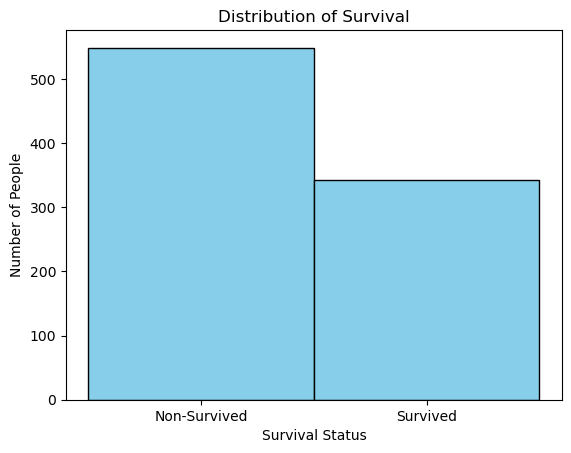

In [12]:
plt.hist(df['survived'], bins=[-0.5, 0.5, 1.5], edgecolor='black', color='skyblue')
plt.xticks([0, 1], ['Non-Survived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Number of People')
plt.title('Distribution of Survival')
plt.show()

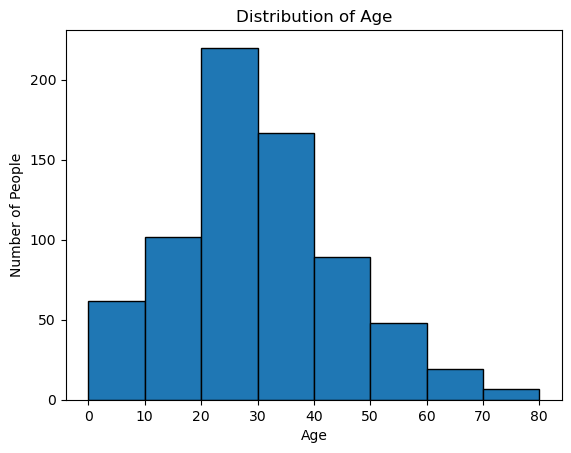

In [13]:
plt.hist(df['age'],bins=[0,10,20,30,40,50,60,70,80], edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Distribution of Age')
plt.show()

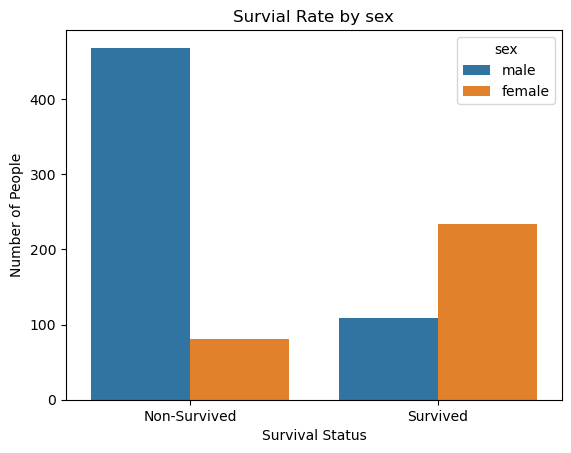

In [14]:
sns.countplot(data=df, x='survived', hue='sex')
plt.xticks([0, 1], ['Non-Survived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Number of People')
plt.title('Survial Rate by sex')
plt.show()

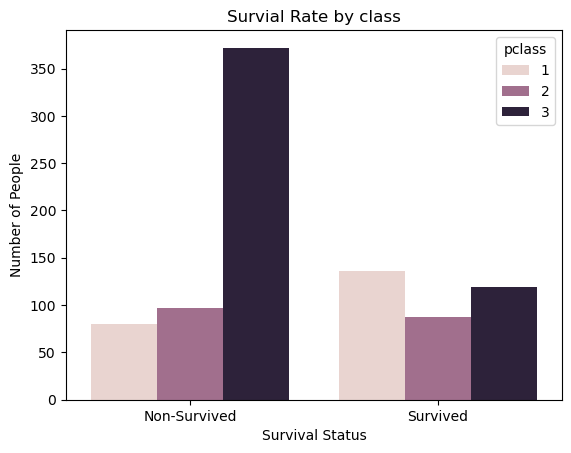

In [15]:
sns.countplot(data=df, x='survived', hue='pclass')
plt.xticks([0, 1], ['Non-Survived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Number of People')
plt.title('Survial Rate by class')
plt.show()

# Task 2

As we can see that deck column have many 77% of null values, so we can delete tha column and age have 20% null values, so we will fix that by taking MEAN 
of each class.

In [16]:
df.groupby('sex')['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [17]:
df.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [18]:
df['age'] = df['age'].fillna(df.groupby('pclass')['age'].transform('mean'))
df['embarked'] = df['embarked'].fillna('S')

In [19]:
df = df.drop(columns=['alive','class','embark_town','deck'])

In [20]:
df_info = pd.DataFrame(info(df))
print(df_info)

    ColumnName DataType  DistinctCount  Null  Percentage
0     survived    int64              2     0         0.0
1       pclass    int64              3     0         0.0
2          sex   object              2     0         0.0
3          age  float64             91     0         0.0
4        sibsp    int64              7     0         0.0
5        parch    int64              7     0         0.0
6         fare  float64            248     0         0.0
7     embarked   object              3     0         0.0
8          who   object              3     0         0.0
9   adult_male     bool              2     0         0.0
10       alone     bool              2     0         0.0


In [21]:
#converting survived feature from int64 to catogery
df['survived'] = df['survived'].astype('category')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True


In [22]:
X = df.drop(columns='survived')
y = df['survived']

In [23]:
#stratify=df['survived']

In [24]:
x_train_,x_test_,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [25]:
#one-hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse_output=False)   #we dont want sparsh matrix instead we want np array so we do sparsh=false

cat_cols = ['sex', 'embarked', 'who', 'adult_male', 'alone']
num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']

x_cat_train = ohe.fit_transform(x_train_[cat_cols])
x_cat_test = ohe.transform(x_test_[cat_cols])

num_cols_train = x_train_[num_cols].values
num_cols_test = x_test_[num_cols].values

x_train = pd.DataFrame(np.hstack((num_cols_train, x_cat_train)))
x_test = pd.DataFrame(np.hstack((num_cols_test, x_cat_test)))

# Create column names
ohe_feature_names = ohe.get_feature_names_out(cat_cols)
final_columns = num_cols + list(ohe_feature_names)

# Assign to the DataFrames
x_train.columns = final_columns
x_test.columns = final_columns


In [26]:
y_train.shape

(712,)

# Task 3

## Logistic Regression

In [52]:
#Tranning
lr = LogisticRegression(random_state=1)
lr.fit(x_train,y_train)
lr_train_score = lr.score(x_train,y_train)
print('Trainning Score',lr_train_score)

#Testing
y_prob = lr.predict_proba(x_test)
y_pred = lr.predict(x_test)
lr_pred_score = accuracy_score(y_test,y_pred)
print('Testing Score',lr_pred_score)

Trainning Score 0.8300561797752809
Testing Score 0.7821229050279329


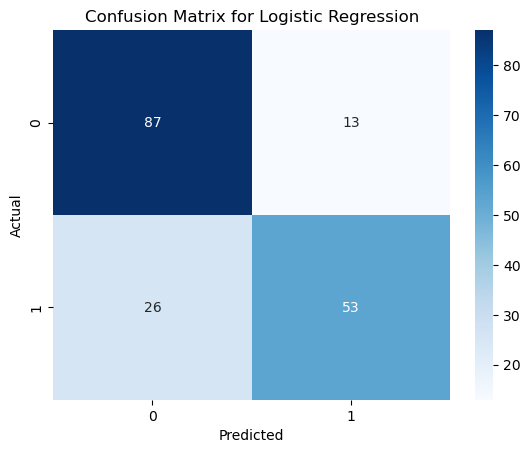

In [54]:
#confusion matrix
cm_lr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_lr, annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

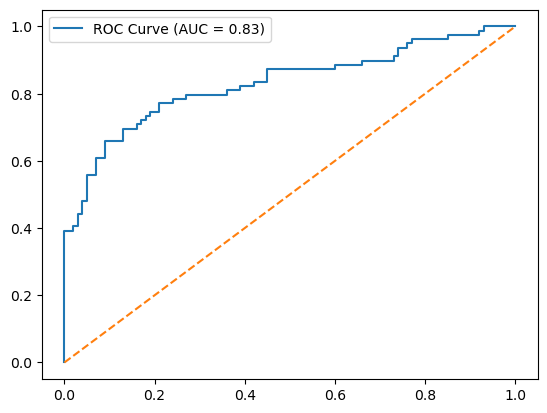

In [29]:
#ROC and AUC curve
fpr, tpr, threshold = roc_curve(y_test,y_prob[:,1])
auc_score = roc_auc_score(y_test,y_prob[:,1])

#plot
plt.plot(fpr,tpr,label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0,1],[0,1],linestyle = '--')
plt.legend()
plt.show()

# Random Forest classifier

In [56]:
#Training
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)
rf_trainScore = rf.score(x_train,y_train)
print('Training Score',rf_trainScore)

#Testing
y_probRF = rf.predict_proba(x_test)
y_predRF = rf.predict(x_test)
rf_testScore = accuracy_score(y_test,y_predRF)
print('Testing Score',rf_testScore)

Training Score 0.9859550561797753
Testing Score 0.8044692737430168


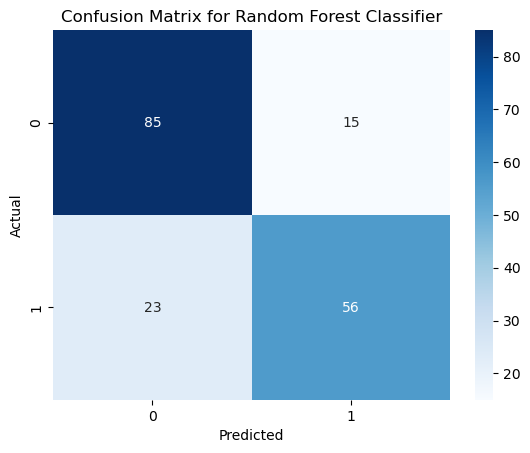

In [31]:
#confusion matrix
cm = confusion_matrix(y_test,y_predRF)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

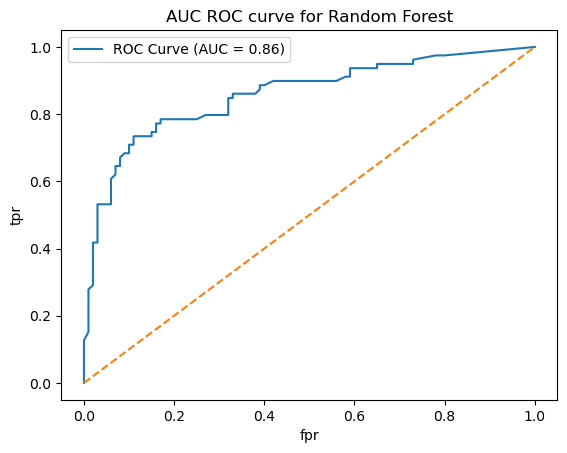

In [58]:
#ROC and AUC curve
fpr, tpr, threshold = roc_curve(y_test,y_probRF[:,1])
auc_score_rf = roc_auc_score(y_test,y_probRF[:,1])

#plot
plt.plot(fpr,tpr,label=f'ROC Curve (AUC = {auc_score_rf:.2f})')
plt.plot([0,1],[0,1],linestyle = '--')
plt.title("AUC ROC curve for Random Forest")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

In [33]:
#feature importance and its plot
importances = rf.feature_importances_
features = x_train.columns
imp_feat = pd.Series(importances,index = features).sort_values(ascending=False)
print(imp_feat)

fare               0.230911
age                0.221630
who_man            0.105256
sex_male           0.092815
adult_male_True    0.088951
pclass             0.080978
sibsp              0.056169
who_woman          0.042116
parch              0.035088
embarked_S         0.020602
alone_True         0.014780
embarked_Q         0.010702
dtype: float64


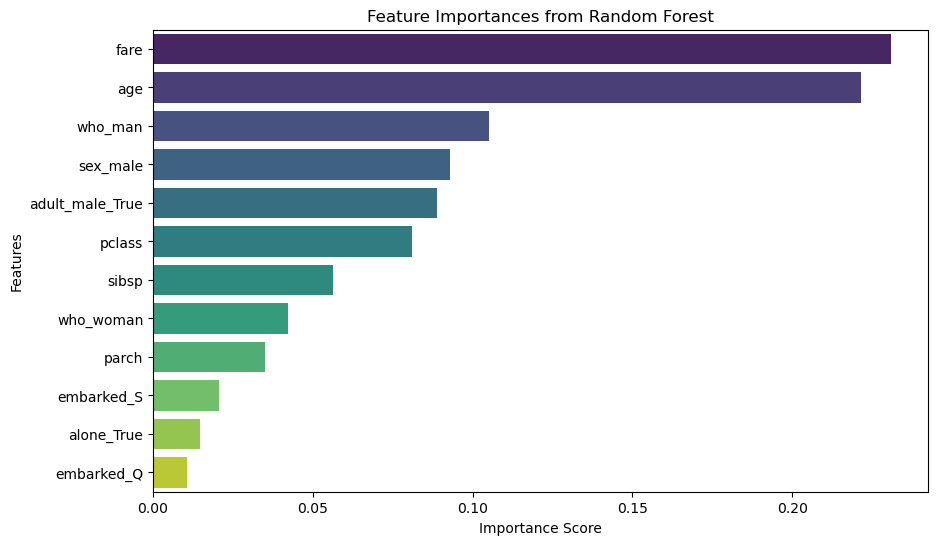

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=imp_feat,y=imp_feat.index, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Hyperparameter Tuning

## Logistic Regression

In [59]:
#OPTUNA Hyperparams tuning
def objective(trial):
    #define H.P
    C = trial.suggest_loguniform('C',1e-4,1e2)

    #model
    model = LogisticRegression(C=C,random_state=1)
    
    #Score
    score = cross_val_score(model,x_train,y_train,cv=3,scoring='accuracy').mean()
    return score

In [60]:
study = optuna.create_study(
    direction='maximize',
    sampler = optuna.samplers.TPESampler()
    )
study.optimize(objective,n_trials=50)

[I 2025-07-11 11:01:18,802] A new study created in memory with name: no-name-2bf1c50b-c6b2-4a9d-89bc-345bc80216b6
[I 2025-07-11 11:01:18,906] Trial 0 finished with value: 0.8272228722712714 and parameters: {'C': 81.87425606621491}. Best is trial 0 with value: 0.8272228722712714.
[I 2025-07-11 11:01:18,978] Trial 1 finished with value: 0.8258282215839922 and parameters: {'C': 3.067514043888788}. Best is trial 0 with value: 0.8272228722712714.
[I 2025-07-11 11:01:19,045] Trial 2 finished with value: 0.8258104929735608 and parameters: {'C': 0.5637441108457488}. Best is trial 0 with value: 0.8272228722712714.
[I 2025-07-11 11:01:19,119] Trial 3 finished with value: 0.8342434020021511 and parameters: {'C': 0.29651212604428606}. Best is trial 3 with value: 0.8342434020021511.
[I 2025-07-11 11:01:19,163] Trial 4 finished with value: 0.7092921556808377 and parameters: {'C': 0.00203485461479669}. Best is trial 3 with value: 0.8342434020021511.
[I 2025-07-11 11:01:19,215] Trial 5 finished with v

In [61]:
print('Best Optimized value:',study.best_trial.value)
print('Best Optimized Params:',study.best_trial.params)

Best Optimized value: 0.8370504319871408
Best Optimized Params: {'C': 0.31123401075467155}


In [63]:
optum_lr = LogisticRegression(C=study.best_trial.params['C'],random_state=1)
optum_lr.fit(x_train,y_train)
optum_lr_score = cross_val_score(optum_lr,x_train,y_train,cv=3,scoring='accuracy').mean()
#optum_lr_train_score = optum_lr.score(x_train,y_train)
print('Training Score:',optum_lr_score)

optum_lr_prob = optum_lr.predict_proba(x_test)
optum_lr_pred = optum_lr.predict(x_test)
optum_pred_score = accuracy_score(y_test,optum_lr_pred)
print('Test score:',optum_pred_score)

Training Score: 0.8370504319871408
Test score: 0.776536312849162


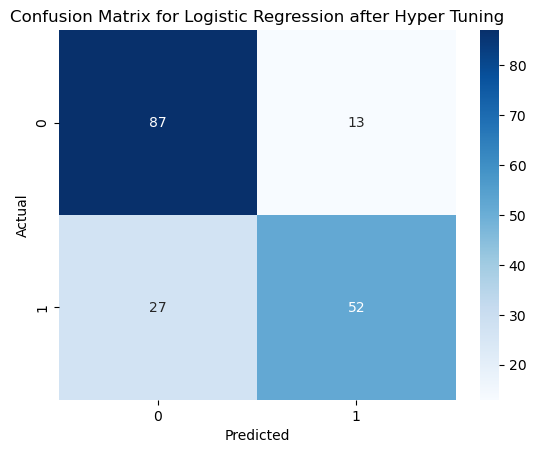

In [64]:
#confusion matrix
cm_lr_hp = confusion_matrix(y_test,optum_lr_pred)
sns.heatmap(cm_lr_hp, annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Logistic Regression after Hyper Tuning")
plt.show()

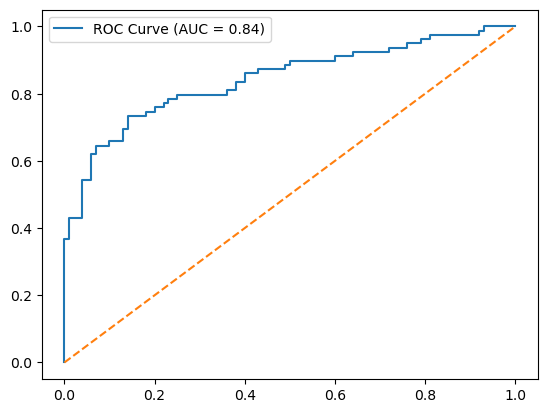

In [65]:
#ROC and AUC curve
fpr, tpr, threshold = roc_curve(y_test,optum_lr_prob[:,1])
auc_score = roc_auc_score(y_test,optum_lr_prob[:,1])

#plot
plt.plot(fpr,tpr,label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0,1],[0,1],linestyle = '--')
plt.legend()
plt.show()

# Random Forest Classifier

In [67]:
def objective(trial):
    #Define HP
    n_estimator = trial.suggest_int('n_estimator',50,200)
    criterion = trial.suggest_categorical('criterion',['gini', 'entropy', 'log_loss'])
    max_samples =  trial.suggest_float('max_samples',0.5,0.9)
    #boostrap = trial.suggest_categorical('boostrap',[True,False])
    
    #Define Model
    model = RandomForestClassifier(
        n_estimators = n_estimator,
        criterion=criterion,
        max_samples=max_samples,random_state=1
        #bootstrap = boostrap
    )
    #score
    score = cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy').mean()
    return score

In [68]:
study = optuna.create_study(
    direction='maximize',
    sampler = optuna.samplers.TPESampler()
)
study.optimize(objective,n_trials=40)

[I 2025-07-11 11:01:55,473] A new study created in memory with name: no-name-7fc20152-820d-4769-8736-325d4e267149
[I 2025-07-11 11:01:56,566] Trial 0 finished with value: 0.8285629863094652 and parameters: {'n_estimator': 106, 'criterion': 'entropy', 'max_samples': 0.5337460465714582}. Best is trial 0 with value: 0.8285629863094652.
[I 2025-07-11 11:01:57,079] Trial 1 finished with value: 0.8299812863193144 and parameters: {'n_estimator': 53, 'criterion': 'gini', 'max_samples': 0.6088471768225842}. Best is trial 1 with value: 0.8299812863193144.
[I 2025-07-11 11:01:58,418] Trial 2 finished with value: 0.8060868708756033 and parameters: {'n_estimator': 144, 'criterion': 'gini', 'max_samples': 0.7710449732035554}. Best is trial 1 with value: 0.8299812863193144.
[I 2025-07-11 11:01:59,484] Trial 3 finished with value: 0.8130995764798582 and parameters: {'n_estimator': 113, 'criterion': 'entropy', 'max_samples': 0.7494376367749778}. Best is trial 1 with value: 0.8299812863193144.
[I 2025-0

In [69]:
print('best trail value',study.best_trial.value)
print('best trail value',study.best_trial.params)

best trail value 0.8342164877376146
best trail value {'n_estimator': 114, 'criterion': 'gini', 'max_samples': 0.5854109933589839}


In [77]:
optum_rf = RandomForestClassifier(
        n_estimators = study.best_trial.params['n_estimator'],
        criterion = study.best_trial.params['criterion'],
        max_samples = study.best_trial.params['max_samples']
        ,random_state=1
    )
optum_rf.fit(x_train,y_train)
#optum_rf_trainScore = optum_rf.score(x_train,y_train)
optum_rf_score = cross_val_score(optum_rf,x_train,y_train,cv=5,scoring='accuracy').mean()
print('Training score:',optum_rf_score)

optum_y_probRF = optum_rf.predict_proba(x_test)
optum_y_predRF = optum_rf.predict(x_test)
optum_rf_testScore = accuracy_score(y_test,optum_y_predRF)
print('Test score:',optum_rf_testScore)

Training score: 0.8342164877376146
Test score: 0.7988826815642458


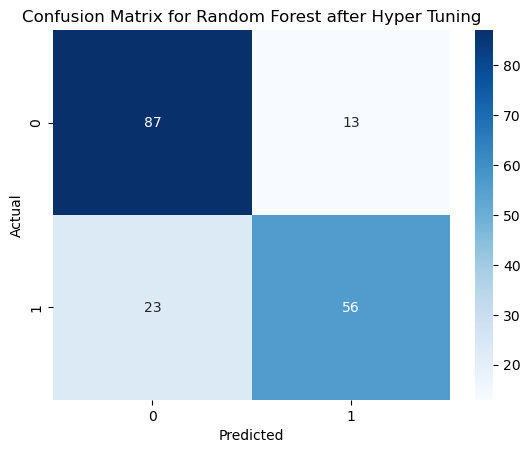

In [78]:
#confusion matrix
cm_rf_hp = confusion_matrix(y_test,optum_y_predRF)
sns.heatmap(cm_rf_hp, annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Random Forest after Hyper Tuning")
plt.show()

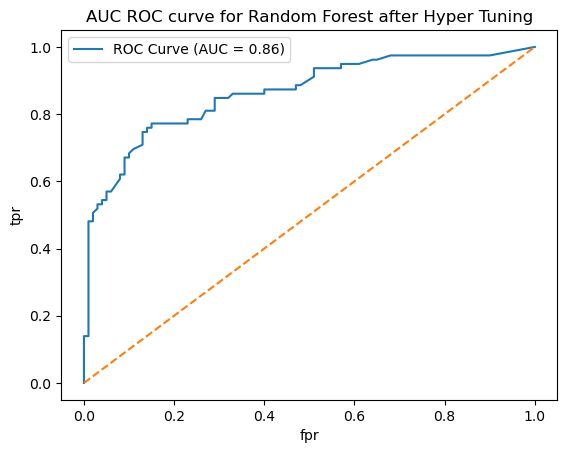

In [79]:
fpr, tpr, threshold = roc_curve(y_test,optum_y_probRF[:,1])
optum_auc_score_rf = roc_auc_score(y_test,y_probRF[:,1])

#plot
plt.plot(fpr,tpr,label=f'ROC Curve (AUC = {auc_score_rf:.2f})')
plt.plot([0,1],[0,1],linestyle = '--')
plt.title("AUC ROC curve for Random Forest after Hyper Tuning")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

In [80]:
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances

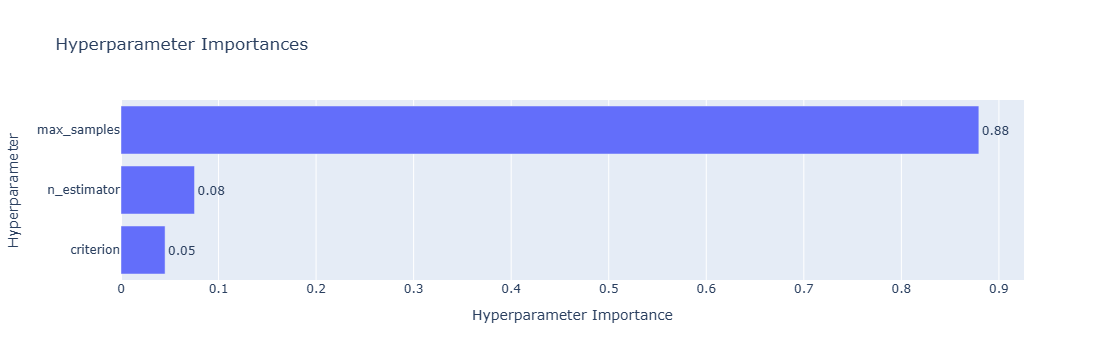

In [81]:
plot_param_importances(study).show()

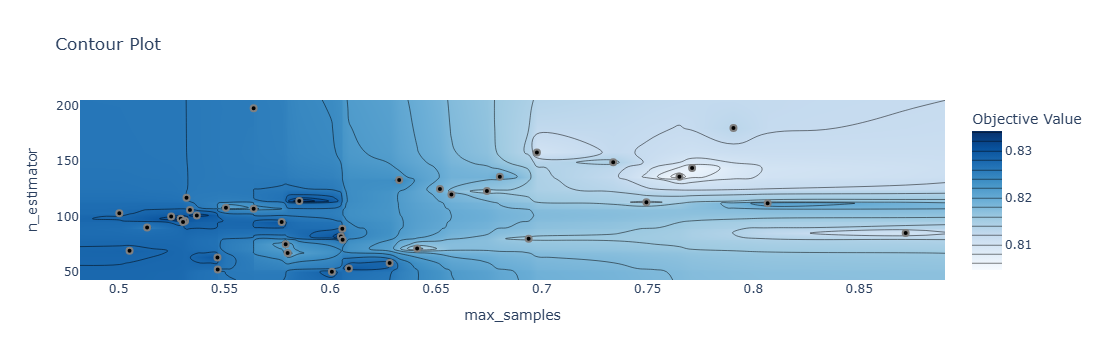

In [85]:
plot_contour(study, params=['max_samples','n_estimator']).show()

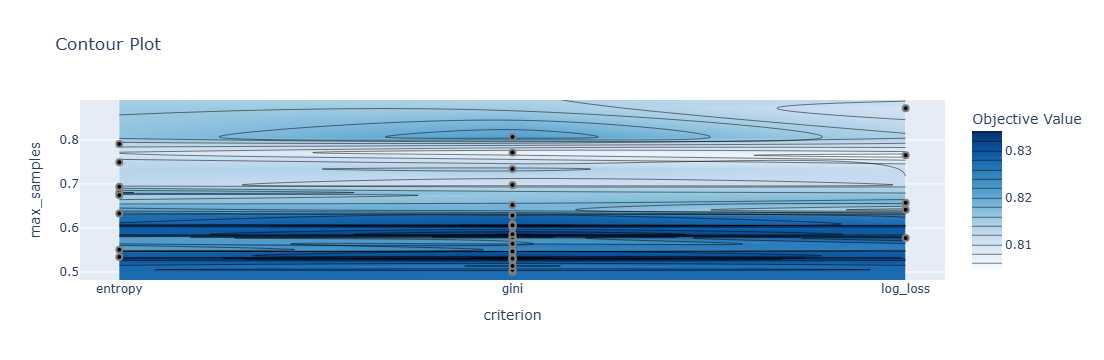

In [86]:
plot_contour(study, params=['max_samples', 'criterion']).show()